In this notebook we explore the responses to the odor onset in the closed loop trials.

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import DataLoader
from db import d_models, make_session
from plot import set_font_size

import CONFIG as C
import LOCAL as L

In [2]:
# trial selection filter
FILT = [
    d_models.Trial.expt == 'closed_loop',
]

session = make_session()
trials = session.query(d_models.Trial).filter(*FILT).all()
session.close()

for trial in trials:
    trial.dl = DataLoader(trial, sfx=0, vel_filt=None)

Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clea

# Odor-triggered DAN and behavioral responses

In [3]:
WINDOW = (-3, 15)  # window surrounding odor onset to look at
PLOTS = np.array([
    ('v_fwd', 'speed', 'air', 'abs_air',),
    ('g2s', 'g2d', 'g2l', 'g2r',),
    ('g3s', 'g3d', 'g3l', 'g3r',),
    ('g4s', 'g4d', 'g4l', 'g4r',),
    ('g5s', 'g5d', 'g5l', 'g5r',),
    ('ddt_g2s', 'ddt_g2d', 'ddt_g2l', 'ddt_g2r',),
    ('ddt_g3s', 'ddt_g3d', 'ddt_g3l', 'ddt_g3r',),
    ('ddt_g4s', 'ddt_g4d', 'ddt_g4l', 'ddt_g4r',),
    ('ddt_g5s', 'ddt_g5d', 'ddt_g5l', 'ddt_g5r',),
])

data = {vbl: [] for vbl in list(PLOTS.flatten()) + ['t']}

for trial in trials:
    t = trial.dl.t
    mask = ((C.ODOR_START+WINDOW[0]) <= t) & (t < (C.ODOR_START+WINDOW[1]))
    for vbl in data.keys():
        if vbl in ['air', 'abs_air']:
            temp = getattr(trial.dl, vbl).copy()
            temp[np.abs(trial.dl.air) >= 90] = np.nan
            data_ = temp[mask]
        else:
            data_ = getattr(trial.dl, vbl)[mask]
            
        data[vbl].append(data_)

/Users/rkp/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal


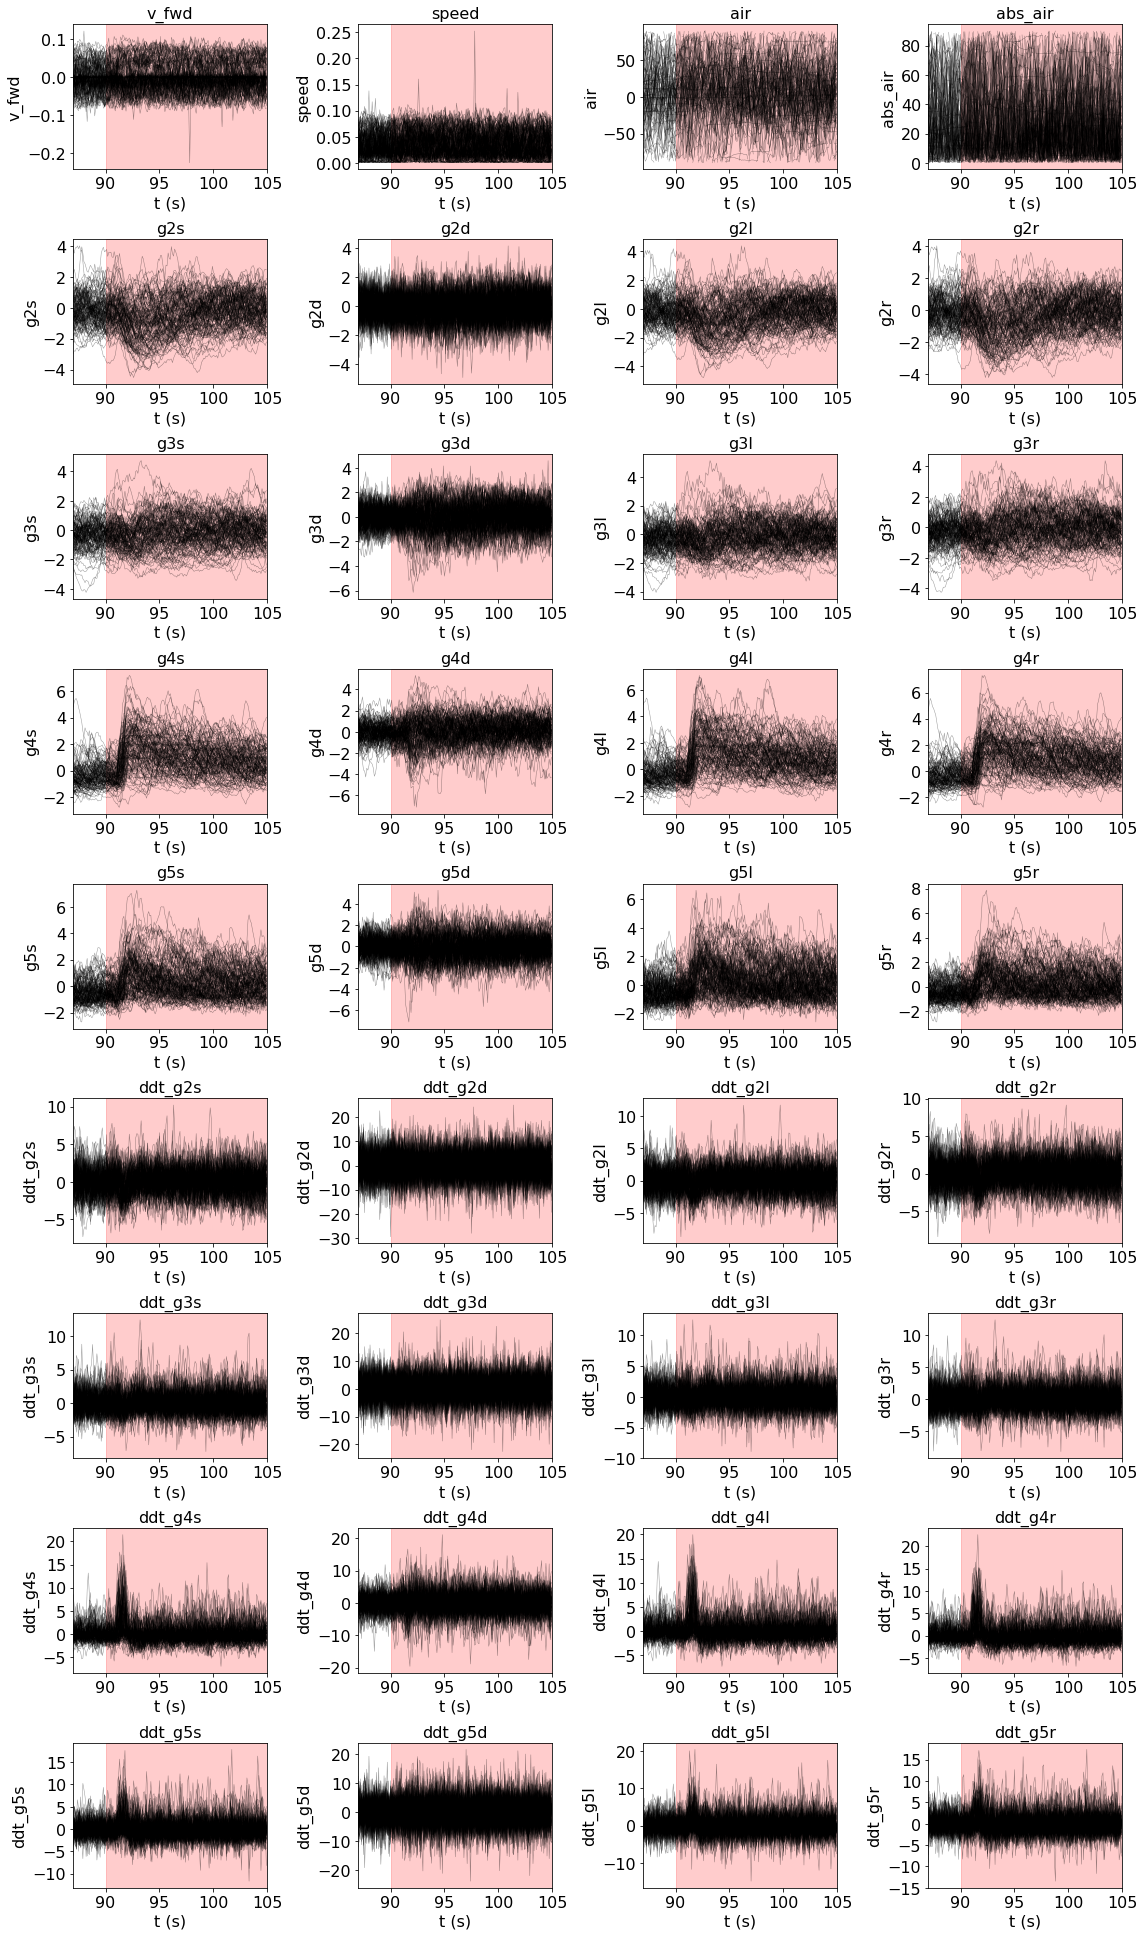

In [4]:
AX_SIZE = (4, 3)
N_ROWS = len(PLOTS)
N_COLS = len(PLOTS[0])
FIG_SIZE = (AX_SIZE[0]*N_COLS, AX_SIZE[1]*N_ROWS)

fig, axs = plt.subplots(N_ROWS, N_COLS, figsize=FIG_SIZE, tight_layout=True, squeeze=False)

for r_ctr, ax_row in enumerate(axs):
    for c_ctr, ax in enumerate(ax_row):
        
        vbl = PLOTS[r_ctr, c_ctr]
        
        for tr_ctr in range(len(trials)):
            ax.plot(data['t'][tr_ctr], data[vbl][tr_ctr], color='k', lw=0.5, alpha=0.4)
        
        ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
        ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
        ax.set_xlabel('t (s)')
        ax.set_ylabel(vbl)
        ax.set_title(vbl)
        
for ax in axs.flatten():
    set_font_size(ax, 16)

### Look at speed and v_fwd response more closely

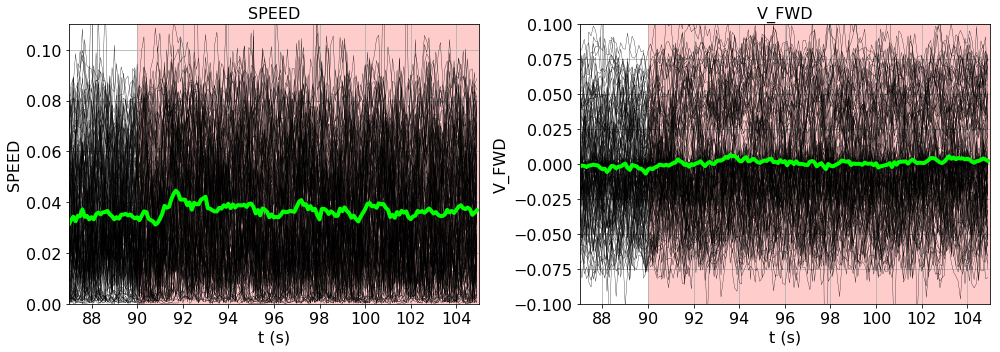

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

for tr_ctr in range(len(trials)):
    
    t = data['t'][tr_ctr]
    
    axs[0].plot(t, data['speed'][tr_ctr], color='k', lw=.3)
    axs[1].plot(t, data['v_fwd'][tr_ctr], color='k', lw=.3)

axs[0].plot(t, np.mean(data['speed'], axis=0), color=(0, 1, 0), lw=4)
axs[1].plot(t, np.mean(data['v_fwd'], axis=0), color=(0, 1, 0), lw=4)

axs[0].set_ylabel('SPEED')
axs[0].set_title('SPEED')
axs[1].set_ylabel('V_FWD')
axs[1].set_title('V_FWD')

axs[0].set_ylim(0, .11)
axs[1].set_ylim(-.1, .1)

for ax in axs:
    ax.grid()
    ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
    ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
    ax.set_xlabel('t (s)')
    
    set_font_size(ax, 16)

### Look at the G4S and DDT_G4S response more closely

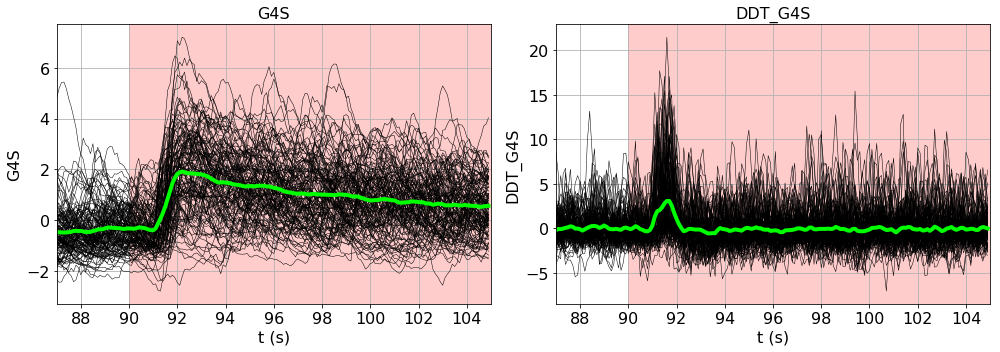

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

for tr_ctr in range(len(trials)):
    
    t = data['t'][tr_ctr]
    
    axs[0].plot(t, data['g4s'][tr_ctr], color='k', lw=.5)
    axs[1].plot(t, data['ddt_g4s'][tr_ctr], color='k', lw=.5)
    
axs[0].plot(t, np.mean(data['g4s'], axis=0), color=(0, 1, 0), lw=4)
axs[1].plot(t, np.mean(data['ddt_g4s'], axis=0), color=(0, 1, 0), lw=4)
    
axs[0].set_ylabel('G4S')
axs[0].set_title('G4S')
axs[1].set_ylabel('DDT_G4S')
axs[1].set_title('DDT_G4S')

for ax in axs:
    ax.grid()
    ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
    ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
    ax.set_xlabel('t (s)')
    
    set_font_size(ax, 16)

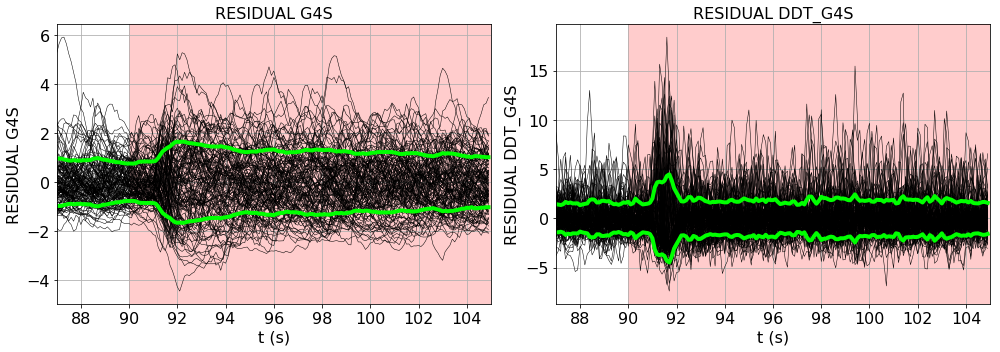

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

mean_g4s = np.mean(data['g4s'], axis=0)
mean_ddt_g4s = np.mean(data['ddt_g4s'], axis=0)

for tr_ctr in range(len(trials)):
    
    t = data['t'][tr_ctr]
    
    axs[0].plot(t, data['g4s'][tr_ctr] - mean_g4s, color='k', lw=.5)
    axs[1].plot(t, data['ddt_g4s'][tr_ctr] - mean_ddt_g4s, color='k', lw=.5)

std_g4s = np.std(data['g4s'], axis=0)
std_ddt_g4s = np.std(data['ddt_g4s'], axis=0)

axs[0].plot(t, -std_g4s, color=(0, 1, 0), lw=4)
axs[0].plot(t, std_g4s, color=(0, 1, 0), lw=4)
axs[1].plot(t, -std_ddt_g4s, color=(0, 1, 0), lw=4)
axs[1].plot(t, std_ddt_g4s, color=(0, 1, 0), lw=4)

axs[0].set_ylabel('RESIDUAL G4S')
axs[0].set_title('RESIDUAL G4S')
axs[1].set_ylabel('RESIDUAL DDT_G4S')
axs[1].set_title('RESIDUAL DDT_G4S')

for ax in axs:
    ax.grid()
    ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
    ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
    ax.set_xlabel('t (s)')
    
    set_font_size(ax, 16)

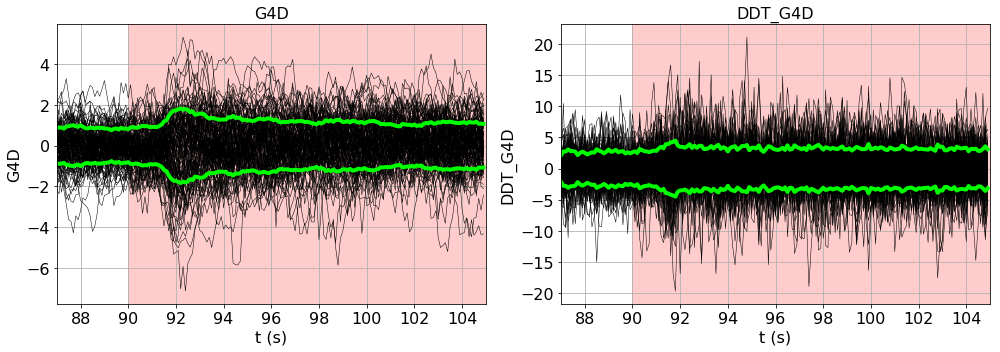

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

for tr_ctr in range(len(trials)):
    
    t = data['t'][tr_ctr]
    
    axs[0].plot(t, data['g4d'][tr_ctr], color='k', lw=.5)
    axs[1].plot(t, data['ddt_g4d'][tr_ctr], color='k', lw=.5)

std_g4d = np.std(data['g4d'], axis=0)
std_ddt_g4d = np.std(data['ddt_g4d'], axis=0)

axs[0].plot(t, -std_g4d, color=(0, 1, 0), lw=4)
axs[0].plot(t, std_g4d, color=(0, 1, 0), lw=4)
axs[1].plot(t, -std_ddt_g4d, color=(0, 1, 0), lw=4)
axs[1].plot(t, std_ddt_g4d, color=(0, 1, 0), lw=4)

axs[0].set_ylabel('G4D')
axs[0].set_title('G4D')
axs[1].set_ylabel('DDT_G4D')
axs[1].set_title('DDT_G4D')

for ax in axs:
    ax.grid()
    ax.axvspan(C.ODOR_START, C.ODOR_START+WINDOW[1], color='r', alpha=0.2)
    ax.set_xlim(C.ODOR_START+WINDOW[0], C.ODOR_START+WINDOW[1])
    ax.set_xlabel('t (s)')
    
    set_font_size(ax, 16)

Plotting the residuals across trials shows that odor onset triggers an increase not only in the mean, but also in the variance of the G4S response and its time derivative.

### Scalar metrics

Make DataFrame of various scalar metrics of the different variables:

* `SPEED`: change in speed shortly after odor onset relative to immediately before
* `AIR_ON`: air tube position at odor onset
* `AIR_ABS_ON`: air tube position absolute value at odor onset
* `G4S_ON`: G4S, time-averaged over short window following odor onset
* `DDT_G4S_ON`: G4S time-derivative, time-averaged over short window following odor onset
* `NEXT_SPEED`: change in speed a little  later after odor onset (after G4DS measurement) relative to before odor onset

In [13]:
COLS = [
    'TRIAL', 'NEXT_SPEED', 'SPEED', 'AIR_ON', 'AIR_ABS_ON',
    'G3S_ON', 'DDT_G3S_ON', 'G4S_ON', 'DDT_G4S_ON']

WINDOW_SPEED = (91.5, 93)
WINDOW_NEXT_SPEED = (94, 96)
WINDOW_G3S = (92, 93)
WINDOW_DDT_G3S = (91, 92)
WINDOW_G4S = (92, 93)
WINDOW_DDT_G4S = (91, 92)

df_data = []

for tr_ctr, trial in enumerate(trials):
    
    t = data['t'][tr_ctr]
    
    df_data_ = {'TRIAL': trial.name}

    # speed shortly after odor onset
    sp_odor_onset = data['speed'][tr_ctr][t >= C.ODOR_START][0]
    mask_speed = (WINDOW_SPEED[0] <= t) & (t < WINDOW_SPEED[1])
    df_data_['SPEED'] = (data['speed'][tr_ctr][mask_speed] - sp_odor_onset).mean()
    
    # speed a little later after odor onset
    mask_next_speed = (WINDOW_NEXT_SPEED[0] <= t) & (t < WINDOW_NEXT_SPEED[1])
    df_data_['NEXT_SPEED'] = (data['speed'][tr_ctr][mask_next_speed] - sp_odor_onset).mean()
    
    # heading at odor onset
    df_data_['AIR_ON'] = data['air'][tr_ctr][t >= C.ODOR_START][0]
    # abs heading at odor onset
    df_data_['AIR_ABS_ON'] = np.abs(data['air'][tr_ctr][t >= C.ODOR_START][0])
    
    # G3S time-averaged over short window following odor onset
    mask_g3s = (WINDOW_G3S[0] <= t) & (t < WINDOW_G3S[1])
    df_data_['G3S_ON'] = data['g3s'][tr_ctr][mask_g3s].mean()
    
    # DDT_G3S time-averaged over short window following odor onset
    mask_ddt_g3s = (WINDOW_DDT_G3S[0] <= t) & (t < WINDOW_DDT_G3S[1])
    df_data_['DDT_G3S_ON'] = data['ddt_g3s'][tr_ctr][mask_ddt_g3s].mean()
    
    # G4S time-averaged over short window following odor onset
    mask_g4s = (WINDOW_G4S[0] <= t) & (t < WINDOW_G4S[1])
    df_data_['G4S_ON'] = data['g4s'][tr_ctr][mask_g4s].mean()
    
    # DDT_G4S time-averaged over short window following odor onset
    mask_ddt_g4s = (WINDOW_DDT_G4S[0] <= t) & (t < WINDOW_DDT_G4S[1])
    df_data_['DDT_G4S_ON'] = data['ddt_g4s'][tr_ctr][mask_ddt_g4s].mean()
    
    df_data.append(df_data_)
    
df = pd.DataFrame(df_data, columns=COLS)

In [14]:
df.round(2)

,TRIAL,NEXT_SPEED,SPEED,AIR_ON,AIR_ABS_ON,G3S_ON,DDT_G3S_ON,G4S_ON,DDT_G4S_ON
0,20160904.Fly4.2,0.00,-0.00,-27.10,27.10,0.87,0.79,0.05,1.75
1,20160904.Fly4.3,-0.00,-0.01,NaN,NaN,0.70,1.07,0.96,-0.75
2,20160904.Fly4.6,-0.02,-0.01,-34.73,34.73,0.61,0.30,0.80,-0.22
3,20160904.Fly4.7,0.02,0.03,NaN,NaN,0.94,0.20,1.13,0.16
4,20160904.Fly5.3,-0.01,-0.01,51.34,51.34,0.33,-0.27,1.32,0.95
5,20160904.Fly5.4,0.01,0.02,11.77,11.77,0.28,0.83,3.70,5.18
6,20160904.Fly6.1,-0.02,-0.02,-59.82,59.82,-0.28,-0.38,0.28,0.29
7,20160904.Fly6.2,0.04,0.05,-32.09,32.09,0.99,-0.58,0.37,0.83
8,20160904.Fly6.3,0.06,0.03,-46.39,46.39,-0.13,0.20,1.00,3.49
9,20160904.Fly6.4,-0.02,-0.04,-23.06,23.06,-0.35,0.07,-0.60,1.46


In [15]:
df.corr()

,NEXT_SPEED,SPEED,AIR_ON,AIR_ABS_ON,G3S_ON,DDT_G3S_ON,G4S_ON,DDT_G4S_ON
NEXT_SPEED,1.000000,0.791324,0.043098,0.015986,0.163674,0.032970,-0.036884,0.029507
SPEED,0.791324,1.000000,0.058013,0.011519,0.053686,-0.012617,0.168743,0.211694
AIR_ON,0.043098,0.058013,1.000000,-0.039081,-0.020069,0.007808,0.048920,0.076870
AIR_ABS_ON,0.015986,0.011519,-0.039081,1.000000,-0.241084,-0.082279,0.071863,-0.054478
G3S_ON,0.163674,0.053686,-0.020069,-0.241084,1.000000,0.538640,-0.303187,-0.279086
DDT_G3S_ON,0.032970,-0.012617,0.007808,-0.082279,0.538640,1.000000,-0.058566,-0.061791
G4S_ON,-0.036884,0.168743,0.048920,0.071863,-0.303187,-0.058566,1.000000,0.826847
DDT_G4S_ON,0.029507,0.211694,0.076870,-0.054478,-0.279086,-0.061791,0.826847,1.000000


Here we see relatively little correlation between the air tube position at the odor onset and the subsequent G4S or DDT_G4S response, which is shown in the scatter plot below.

In [16]:
from scipy.stats import pearsonr, ttest_1samp

In [17]:
ttest_1samp(df['SPEED'], 0)

Ttest_1sampResult(statistic=3.8156283601508525, pvalue=0.0002124924992648629)

In [19]:
mask = ~np.isnan(df['AIR_ABS_ON'])
pearsonr(df['AIR_ABS_ON'][mask], df['G3S_ON'][mask])

(-0.2410838258155423, 0.01924460984141978)

In [21]:
pearsonr(df['NEXT_SPEED'], df['G3S_ON'])

(0.16367414654600332, 0.067056130747598405)

In [22]:
pearsonr(df['SPEED'], df['DDT_G4S_ON'])

(0.21169432610966207, 0.017330686539012884)

However, we see that the change in mean speed given the odor onset is in fact significant.

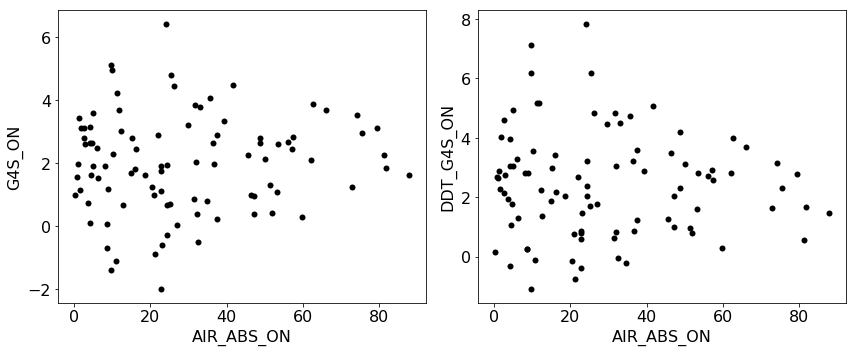

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

axs[0].scatter(df['AIR_ABS_ON'], df['G4S_ON'], c='k', lw=0)
axs[0].set_xlabel('AIR_ABS_ON')
axs[0].set_ylabel('G4S_ON')

axs[1].scatter(df['AIR_ABS_ON'], df['DDT_G4S_ON'], c='k', lw=0)
axs[1].set_xlabel('AIR_ABS_ON')
axs[1].set_ylabel('DDT_G4S_ON')

for ax in axs.flatten():
    set_font_size(ax, 16)

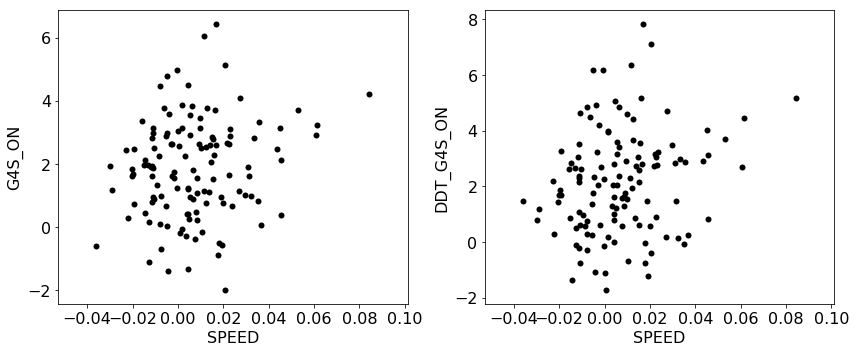

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

axs[0].scatter(df['SPEED'], df['G4S_ON'], c='k', lw=0)
axs[0].set_xlabel('SPEED')
axs[0].set_ylabel('G4S_ON')

axs[1].scatter(df['SPEED'], df['DDT_G4S_ON'], c='k', lw=0)
axs[1].set_xlabel('SPEED')
axs[1].set_ylabel('DDT_G4S_ON')

for ax in axs.flatten():
    set_font_size(ax, 16)

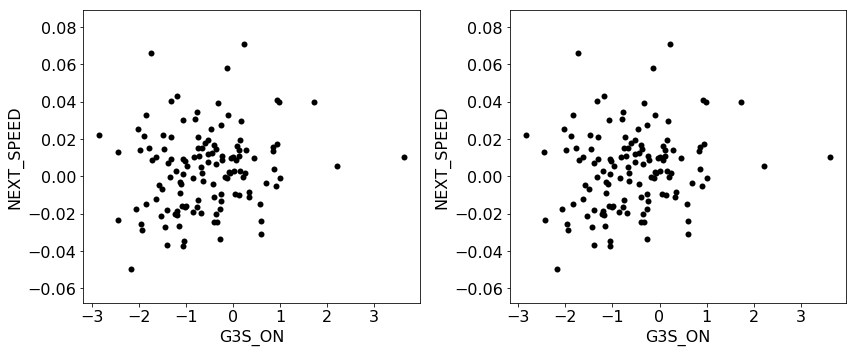

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)

axs[0].scatter(df['G3S_ON'], df['NEXT_SPEED'], c='k', lw=0)
axs[0].set_xlabel('G3S_ON')
axs[0].set_ylabel('NEXT_SPEED')

axs[1].scatter(df['G3S_ON'], df['NEXT_SPEED'], c='k', lw=0)
axs[1].set_xlabel('G3S_ON')
axs[1].set_ylabel('NEXT_SPEED')

for ax in axs.flatten():
    set_font_size(ax, 16)

# Compare speed filters before and at odor onset

In [135]:
%reset -f
%matplotlib inline
from copy import deepcopy
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from aux import make_extended_predictor_matrix
from data import DataLoader
from db import d_models, make_session
from plot import set_font_size

import CONFIG as C
import LOCAL as L

cc = np.concatenate

In [136]:
# trial selection filter
FILT = [
    d_models.Trial.expt == 'closed_loop',
]
EARLIEST = '20170111'
DATE_FORMAT = '%Y%m%d'

# additional filter to select only trials after 2017.01.11 (which report the fly's true
# forward velocity)
def is_recent(trial):
    date = datetime.strptime(trial.name[:8], DATE_FORMAT)
    return date >= datetime.strptime(EARLIEST, DATE_FORMAT)

session = make_session()
trials = session.query(d_models.Trial).filter(*FILT).all()
session.close()

trials = [trial for trial in trials if is_recent(trial)]

for trial in trials:
    trial.dl = DataLoader(trial, sfx=0, vel_filt=None)

Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clean_0.csv"...
Loading clean data from file "clea

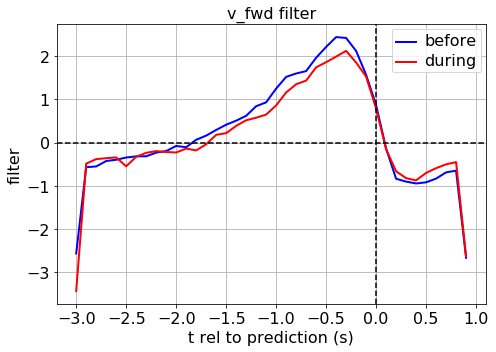

In [196]:
# make predictor matrix and target vector before and during odor
PRED = 'v_fwd'
TARG = 'g4s'
WINDOW = (-30, 10)  # timesteps
SPANS = {'before': (-47, -2), 'during': (3, 48)}  # seconds (rel to odor onset)

preds = {'before': [], 'during': []}
targs = {'before': [], 'during': []}
means = {'before': None, 'during': None}

for trial in trials:

    for key, span in SPANS.items():
        
        # get extended predictor matrix
        pred_ = getattr(trial.dl, PRED)
        pred = make_extended_predictor_matrix(
            vs={PRED: pred_}, windows={PRED: WINDOW}, order=[PRED])
        
        # get target vector
        targ = getattr(trial.dl, TARG)
        
        # mask out all but relevant timepoints
        start = C.ODOR_START + span[0]
        end = C.ODOR_START + span[1]
        
        mask = (start <= trial.dl.t) & (trial.dl.t < end)
        
        # store data
        preds[key].append(pred[mask])
        targs[key].append(targ[mask])
        
# subtract mean targ response during both spans
for key in SPANS:
    mean = np.mean(targs[key], axis=0)
    means[key] = mean
    
    for tr_ctr in range(len(trials)):
        targs[key][tr_ctr] = targs[key][tr_ctr] - mean
    
    assert np.all(np.mean(targs[key], 0) < 1e-15)

# concatenate each set of preds/targs across trials
for key in SPANS:
    preds_ = cc(preds[key])
    targs_ = cc(targs[key])
    
    valid_mask = np.all(~np.isnan(cc([preds_, targs_[:, None]], axis=1)), axis=1)
    
    preds[key] = preds_[valid_mask]
    targs[key] = targs_[valid_mask]

# fit linear models
MODEL = Ridge(alpha=0)

lms = {'before': None, 'during': None}
filts = {'before': None, 'during': None}
r2s = {'before': None, 'during': None}

for key in SPANS:
    lm = deepcopy(MODEL)
    lms[key] = lm.fit(preds[key], targs[key])
    
    r2s[key] = lm.score(preds[key], targs[key])
    filts[key] = lm.coef_
    
# make plots
COLORS = {'before': 'b', 'during': 'r'}

fig, ax = plt.subplots(1, 1, figsize=(7, 5), tight_layout=True)
t = np.arange(*WINDOW) * C.DT

for key, color in COLORS.items():
    ax.plot(t, filts[key], color=color, lw=2)

ax.axhline(0, color='k', ls='--')
ax.axvline(0, color='k', ls='--')
ax.grid()
ax.set_xlabel('t rel to prediction (s)')
ax.set_ylabel('filter')
ax.set_title('v_fwd filter')
ax.legend(COLORS.keys())

set_font_size(ax, 16)

In [ ]:
preds_test = preds['before'][:, 1:-1]
lm_test = lms['before']
lm_test.coef_ = lm_test.coef_[1:-1]
filt_true = lm_test.coef_

t_test = t[1:-1]

fig, ax = plt.subplots(1, 1, tight_layout=True)

ax.plot(t_test, filt_true, color='k', lw=2)
ax.set_xlabel('t rel. to prediction (s)')
ax.set_ylabel('filter coef')

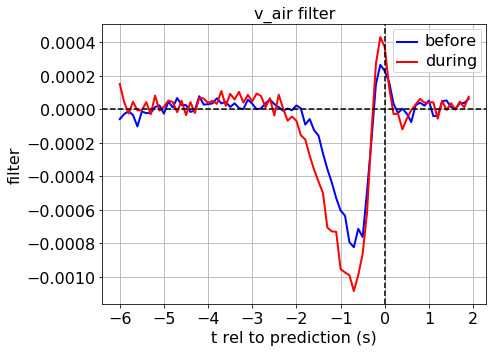

In [192]:
# make predictor matrix and target vector before and during odor
PRED = 'v_air'
TARG = 'g4d'
WINDOW = (-60, 20)  # timesteps
SPANS = {'before': (-47, -2), 'during': (13, 58)}  # seconds (rel to odor onset)

preds = {'before': [], 'during': []}
targs = {'before': [], 'during': []}
means = {'before': None, 'during': None}

for trial in trials:

    for key, span in SPANS.items():
        
        # get extended predictor matrix
        pred_ = getattr(trial.dl, PRED)
        pred = make_extended_predictor_matrix(
            vs={PRED: pred_}, windows={PRED: WINDOW}, order=[PRED])
        
        # get target vector
        targ = getattr(trial.dl, TARG)
        
        # mask out all but relevant timepoints
        start = C.ODOR_START + span[0]
        end = C.ODOR_START + span[1]
        
        mask = (start <= trial.dl.t) & (trial.dl.t < end)
        
        # store data
        preds[key].append(pred[mask])
        targs[key].append(targ[mask])
        
# subtract mean targ response during both spans
for key in SPANS:
    mean = np.mean(targs[key], axis=0)
    means[key] = mean
    
    for tr_ctr in range(len(trials)):
        targs[key][tr_ctr] = targs[key][tr_ctr] - mean
    
    assert np.all(np.mean(targs[key], 0) < 1e-15)

# concatenate each set of preds/targs across trials
for key in SPANS:
    preds_ = cc(preds[key])
    targs_ = cc(targs[key])
    
    valid_mask = np.all(~np.isnan(cc([preds_, targs_[:, None]], axis=1)), axis=1)
    
    preds[key] = preds_[valid_mask]
    targs[key] = targs_[valid_mask]
    
# fit linear models
MODEL = Ridge(alpha=0)

lms = {'before': None, 'during': None}
filts = {'before': None, 'during': None}
r2s = {'before': None, 'during': None}

for key in SPANS:
    lm = deepcopy(MODEL)
    lms[key] = lm.fit(preds[key], targs[key])
    
    r2s[key] = lm.score(preds[key], targs[key])
    filts[key] = lm.coef_
    
# make plots
COLORS = {'before': 'b', 'during': 'r'}

fig, ax = plt.subplots(1, 1, figsize=(7, 5), tight_layout=True)
t = np.arange(*WINDOW) * C.DT

for key, color in COLORS.items():
    ax.plot(t, filts[key], color=color, lw=2)

ax.axhline(0, color='k', ls='--')
ax.axvline(0, color='k', ls='--')
ax.grid()
ax.set_xlabel('t rel to prediction (s)')
ax.set_ylabel('filter')
ax.set_title('{} filter'.format(PRED))
ax.legend(COLORS.keys())

set_font_size(ax, 16)